# 😵

In [144]:
import pandas as pd

df = pd.read_csv("diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [145]:
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [146]:
x = df.iloc[:,0:8]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [147]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) #imp

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [148]:
from sklearn.neighbors import KNeighborsClassifier

nn = KNeighborsClassifier(n_neighbors=15) # 12 
model = nn.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


In [149]:
diff = pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
diff

,Actual,Prediction
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [150]:
diff.to_csv("diabetes_data.csv")

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[84, 15],
       [22, 33]], dtype=int64)

In [152]:
print(cm[0][0]) #TN True Negative
print(cm[0][1]) #FP
print(cm[1][0]) #FN
print(cm[1][1]) #TP True Positive


84
15
22
33


In [153]:
TN = cm[0][0]
FP = cm[0][1] 
FN = cm[1][0]
TP = cm[1][1]


In [154]:
# Positive Find

model_accuracy = (TP+TN)/(TP+FP+FN+TN)
print(model_accuracy)

0.7597402597402597


In [155]:
# Error Find

model_accuracy = (FP+FN)/(TN+FP+FN+TP)
print(model_accuracy)

0.24025974025974026


In [156]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy)
print("Error Rate:",1-Accuracy)

0.7597402597402597
Error Rate: 0.24025974025974028


In [157]:
# from sklearn.neighbors import KNeighborsClassifier

# score=[]

# for i in range(1,50):
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#     model = KNeighborsClassifier(n_neighbors=i)
#     model.fit(x_train,y_train)
#     y_pred=model.predict(x_test)
#     score.append(metrics.accuracy_score(y_test,y_pred))
    
# print(score)
# score.index(max(score)) # 18 index
# # score.index(min(score))   #16 index

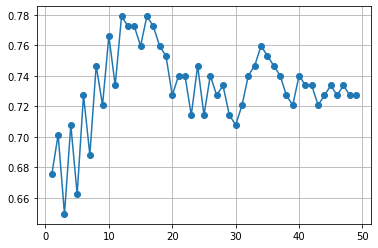

In [158]:
import matplotlib.pyplot as plt
plt.plot(range(1,50),score,marker="o")
plt.grid()

In [159]:
sensitivity = (TP)/(TP+FN)   #1
print(sensitivity)

0.6


In [162]:
specificity = (TN)/(TN+FP)   #0
print(specificity)

0.8484848484848485


In [163]:
from sklearn import metrics

print('sensitivity',metrics.recall_score(y_test,y_pred))
print('specificity',metrics.recall_score(y_test,y_pred,pos_label=0))

sensitivity 0.6
specificity 0.8484848484848485


In [164]:
precision = (TP)/(TP+FP)
print(precision)

0.6875


In [165]:
metrics.precision_score(y_test,y_pred)

0.6875

In [166]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



# Tshirt

In [168]:
import pandas as pd

df = pd.read_csv('tshirt.csv')
df

,Height,Wight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [170]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(18, 2)
(18,)


In [173]:
from sklearn.neighbors import KNeighborsClassifier

nn = KNeighborsClassifier(n_neighbors=5) 
model = nn.fit(x,y)
y_pred = model.predict(x)
print(y_pred)

['M' 'M' 'M' 'M' 'M' 'M' 'L' 'M' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L']


In [174]:
diff = pd.DataFrame({"Actual":y,"Prediction":y_pred})
diff

,Actual,Prediction
0,M,M
1,M,M
2,M,M
3,M,M
4,M,M
5,M,M
6,M,L
7,L,M
8,L,L
9,L,L


In [175]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
cm

array([[10,  1],
       [ 1,  6]], dtype=int64)

In [180]:
from sklearn import metrics

print('sensitivity',metrics.recall_score(y,y_pred,pos_label='M'))
print('specificity',metrics.recall_score(y,y_pred,pos_label='L'))

sensitivity 0.8571428571428571
specificity 0.9090909090909091


In [181]:
print(metrics.classification_report(y,y_pred))

              precision    recall  f1-score   support

           L       0.91      0.91      0.91        11
           M       0.86      0.86      0.86         7

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18



In [3]:
import pandas as pd

df = pd.read_csv('DecisionTreeDataset -Num.csv')
df

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,0,1,1,1
9,1,1,1,1,1


In [4]:
df.isna().sum()

CGPA                 0
Communication        0
Apptitude            0
Programming Skill    0
Job Offered          0
dtype: int64

In [7]:
x = df.drop('Job Offered',axis=1)
y = df['Job Offered']
print(x.shape)
print(y.shape)

(18, 4)
(18,)


In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree_entropy = DecisionTreeClassifier(criterion='entropy')
model = dtree_entropy.fit(x,y)

In [9]:
y_pred = model.predict(x)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [10]:
dtree_entropy.get_depth()

3

In [11]:
from sklearn import tree
text_rep = tree.export_text(dtree_entropy)
print(text_rep)

|--- feature_2 <= 0.50
|   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 1



In [12]:
from sklearn import tree
text_rep = tree.export_text(dtree_entropy,feature_names=list(x.columns))
print(text_rep)

|--- Apptitude <= 0.50
|   |--- class: 0
|--- Apptitude >  0.50
|   |--- Communication <= 0.50
|   |   |--- CGPA <= 1.50
|   |   |   |--- class: 0
|   |   |--- CGPA >  1.50
|   |   |   |--- class: 1
|   |--- Communication >  0.50
|   |   |--- class: 1



In [13]:
diff = pd.DataFrame({"Actual":y,"Predicted":y_pred})
diff

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,1,1


In [14]:
from sklearn import metrics
cm = metrics.confusion_matrix(y,y_pred)
cm

array([[10,  0],
       [ 0,  8]], dtype=int64)

In [16]:
print("Accuracy:",metrics.accuracy_score(y,y_pred))
print("Sensitivity:",metrics.recall_score(y,y_pred,pos_label=1))
print("Specificy:",metrics.recall_score(y,y_pred,pos_label=0))

Accuracy: 1.0
Sensitivity: 1.0
Specificy: 1.0


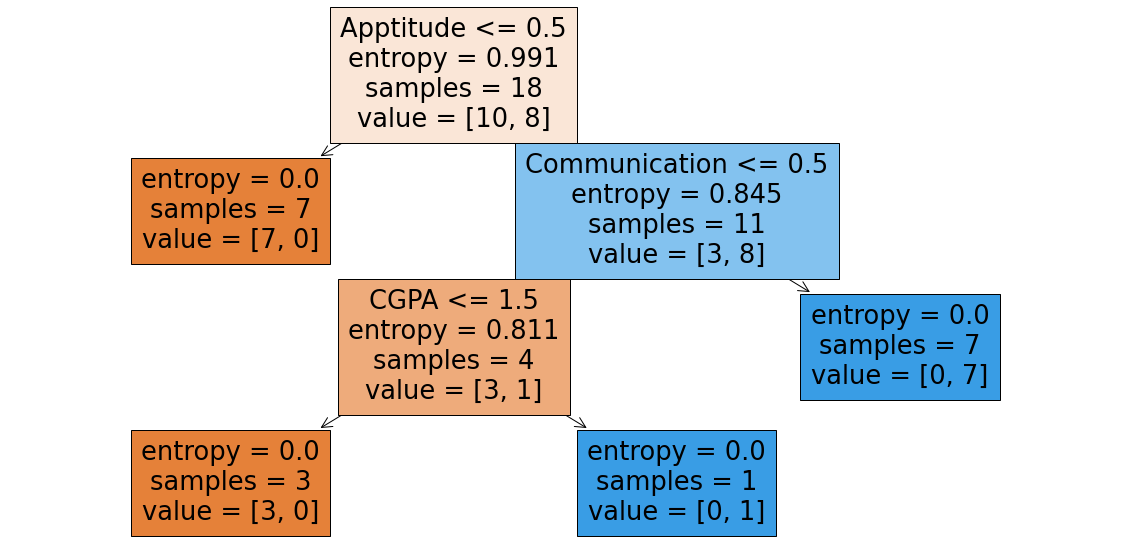

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dtree_entropy,feature_names=list(x.columns),filled=True)
plt.show()